In [ ]:
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from scipy import ndimage

In [ ]:
# Load gambar dari internet
url = "https://1.bp.blogspot.com/-rKwFQMrr1j4/XqEpg9LSZ-I/AAAAAAAAGls/M0dmcFd7FOsC1l5kZ3GERhwbJJfadh0AQCNcBGAsYHQ/s1600/color.jpg"
img = io.imread(url)

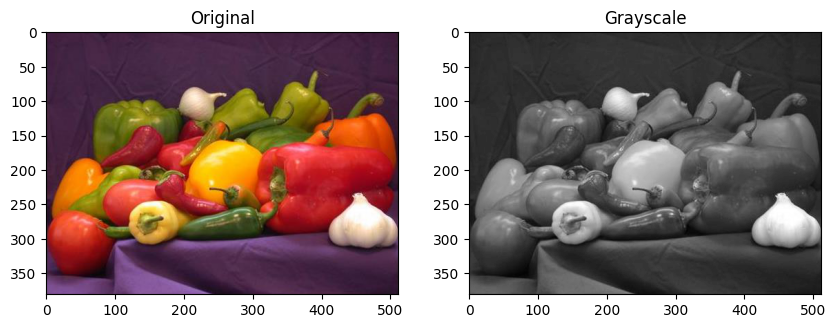

In [ ]:
# Mengubah gambar menjadi grayscale dengan dot product
img_gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

# Plot gambar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].set_title("Original")
axes[0].axis("on")

axes[1].imshow(img_gray, cmap='gray')
axes[1].set_title("Grayscale")
axes[1].axis("on")

plt.show()

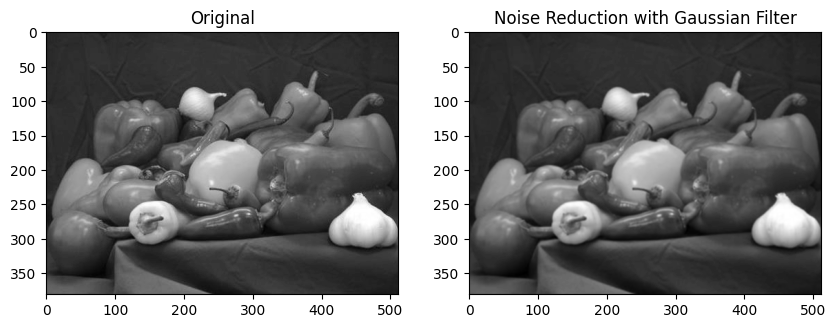

In [ ]:
def gaussian_kernel(size, sigma=1):
    # Hitung nilai setengah dari kernel
    half_size = int(size) // 2
    # Buat matriks koordinat (x, y)
    x, y = np.mgrid[-half_size : half_size + 1, -half_size : half_size + 1]
    # Hitung nilai normalisasi faktor
    normal = 1 / (2.0 * np.pi * sigma ** 2)
    # Hitung nilai kernel Gaussian untuk setiap titik (x, y) pada matriks
    g = np.exp(-((x ** 2 + y ** 2) / (2.0 * sigma ** 2))) * normal
    return g

# Inisiasi variabel kernel untuk Gaussian filter
kernel_size = 3
kernel_sigma = 1
kernel = gaussian_kernel(kernel_size, sigma=kernel_sigma)

# Terapkan Gaussian filter ke gambar yang sudah di-grayscale
smoothed_img = ndimage.convolve(img_gray, kernel)

# Plot gambar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original")
axes[0].axis("on")

axes[1].imshow(smoothed_img, cmap='gray')
axes[1].set_title("Noise Reduction with Gaussian Filter")
axes[1].axis("on")

plt.show()

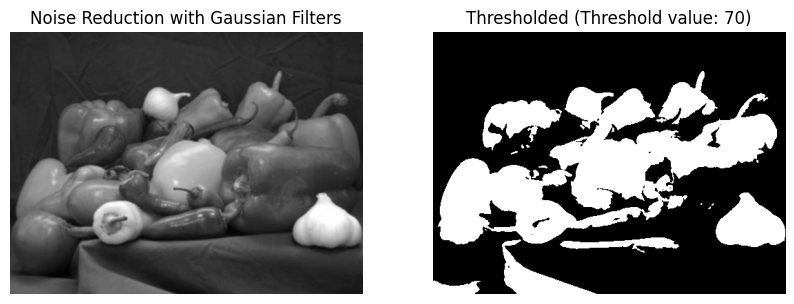

In [ ]:
# Fungsi threshold
def threshold(img, threshold):
    img_thresholded = np.where(img > threshold, 255, 0)
    return img_thresholded.astype('uint8')

# Threshold hasil gaussian filter
threshold_value = 70
img_thresholded = threshold(smoothed_img, threshold_value)

# Plot gabar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(smoothed_img, cmap='gray')
axes[0].set_title("Noise Reduction with Gaussian Filters")
axes[0].axis("off")
axes[1].imshow(img_thresholded, cmap='gray')
axes[1].set_title("Thresholded (Threshold value: {})".format(threshold_value))
axes[1].axis("off")

plt.show()


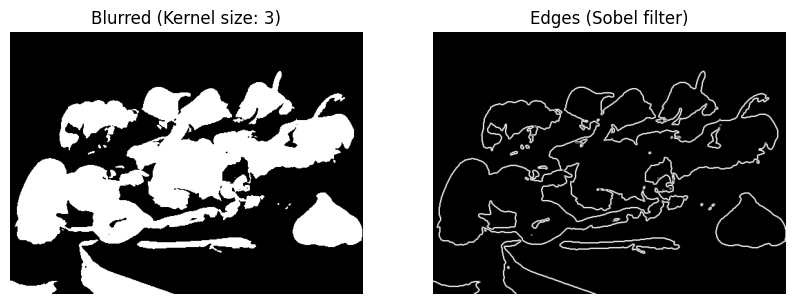

In [ ]:
# Fungsi sobel filter
def sobel_filter(img):
    filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    filter_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Melakukan konvolusi filter terhadap gambar
    img_sobel_x = convolve(img, filter_x)
    img_sobel_y = convolve(img, filter_y)

    # Hitung magnitudo gradien
    img_sobel_mag = np.sqrt(img_sobel_x ** 2 + img_sobel_y ** 2)
    img_sobel_mag /= np.max(img_sobel_mag)

    # Plot gambar
    return img_sobel_mag

# Fungsi konvulosi
def convolve(img, kernel):
    m, n = kernel.shape
    y, x = img.shape
    y -= m - 1
    x -= m - 1
    result = np.zeros((y, x))
    for i in range(y):
        for j in range(x):
            result[i, j] = (kernel * img[i:i+m, j:j+m]).sum()
    return result

# Deteksi tepi dengan filter Sobel
img_sobel = sobel_filter(img_thresholded)

# Tampilkan gambar yang sudah di-blur dan hasil deteksi tepi dalam satu bingkai
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_thresholded, cmap='gray')
axes[0].set_title("Blurred (Kernel size: {})".format(kernel_size))
axes[0].axis("off")
axes[1].imshow(img_sobel, cmap='gray')
axes[1].set_title("Edges (Sobel filter)")
axes[1].axis("off")
plt.show()
